In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from plotly import __version__
import plotly.plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly
plotly.tools.set_credentials_file(username='HarshiItha', api_key='9E1DyTnfcgXi7xsa0tUo')
cf.go_offline()

In [3]:
df = pd.read_csv('KNN_Project_Data')
df

XVPM         GWYH         TRAT        TLLZ         IGGA  \
0    1636.670614   817.988525  2565.995189  358.347163   550.417491   
1    1013.402760   577.587332  2644.141273  280.428203  1161.873391   
2    1300.035501   820.518697  2025.854469  525.562292   922.206261   
3    1059.347542  1066.866418   612.000041  480.827789   419.467495   
4    1018.340526  1313.679056   950.622661  724.742174   843.065903   
5    1587.993461   667.420121  2072.048544  364.624958   905.011385   
6    1497.293624   822.435853   908.059366  671.797517  1280.270442   
7    1172.820769  1166.958461   455.656588  445.572745  1109.894585   
8     839.494647  1089.747059   653.699894  659.334590  1529.725972   
9    1028.689140   202.089774  1030.841860  429.109102   943.104815   
10   1042.945431   826.009900   741.518594  548.237381  1528.675999   
11    715.533949   768.001549  1513.342810   95.995876  1281.787242   
12    747.291672   686.633284  1616.229550  511.187764  1134.462664   
13   1283.507423   431.894668  1546.932746  561.885634   525.956592   
14    520.803032   804.054262  1758.460120  485.304401  1130.508717   
15    873.129617   452.918372  2502.381633  473.005027  1104.841980   
16    788.743418  1074.643318  1590.149211  352.876013   264.318910   
17   1656.397158  1246.507359   819.564695  759.176657  1177.173127   
18   1659.985069   564.261480  1330.514249  351.212679  1133.611093   
19    977.970511  1256.551409  1296.039273  446.883756   856.889614   
20   1590.953919  1642.642026  1441.558864  452.355252  1185.151256   
21    925.510081  1208.215974  1535.052971  348.723685   822.428045   
22   1112.177643  1299.353372  3088.971728  482.290683   976.809411   
23    869.276572  1553.333984   627.141983  713.373251   907.852126   
24   1004.468897   352.752672  1837.076385  383.005294  1251.250803   
25   1195.067484   309.873188  1427.623387  481.560333  1181.589813   
26    727.158656   761.818119   665.342108  522.930787  1187.126255   
27    969.205367  1222.820168   458.071485  277.527595   973.021138   
28   1379.823388   587.750305  1652.746728  637.349320  1171.338396   
29   1528.677741  1030.704153   377.763469  460.892551   618.918243   
..           ...          ...          ...         ...          ...   
970  1067.094782  1400.263470   462.956416  414.528236   757.106327   
971  1169.729647  1343.552791   476.291005  515.018777   755.070227   
972  1395.112643   877.026618  1930.405078  420.840246  1135.372934   
973  1213.701723  1923.503348   463.006318  528.332521   646.820247   
974   187.245121   753.291558  2184.816390  428.487582  1257.843352   
975   642.274662  1598.395843  1983.678827  536.420391   905.944502   
976  1160.130178  1424.882986  2685.683839  388.966098  1521.797380   
977   788.405727  1540.604940  1156.776118  786.797682   727.942977   
978   561.382416  1527.646178  1573.555631  519.787877   740.784615   
979  1113.616465   977.003126  2071.369219  499.248340   740.962062   
980   635.381025   342.779369  1644.051697  399.739271  1083.412274   
981  1252.147212  1020.212582  1522.005721  472.940776   717.271901   
982  1491.461635   848.390472  1383.572563  676.906521   673.043524   
983  1376.039864   619.244435  1784.958801  564.174930   884.468806   
984  1374.066826  1025.674843  1970.559967  293.887740   755.154441   
985  1545.482978   557.860668  2185.376904  308.091803   834.956145   
986  1082.365554  1403.686759  1079.668873  347.016942   287.122764   
987  1041.256157   660.415840  1684.855524  588.532181   621.133694   
988  1429.763548   624.051699  2591.180052  679.979205  1211.859421   
989   951.766628   220.419796  2131.858934  428.929439   536.440787   
990  1679.656397   676.152325  1639.431940  671.864999   422.011608   
991   897.886819   293.452765  1836.608971  590.701800   935.558708   
992   876.207147   674.848136  2229.222535  363.401654   736.514750   
993  1044.078216   511.730506  1471.606457  463.401379  1439.383352   
994   648.691126  1188.990869  1990.

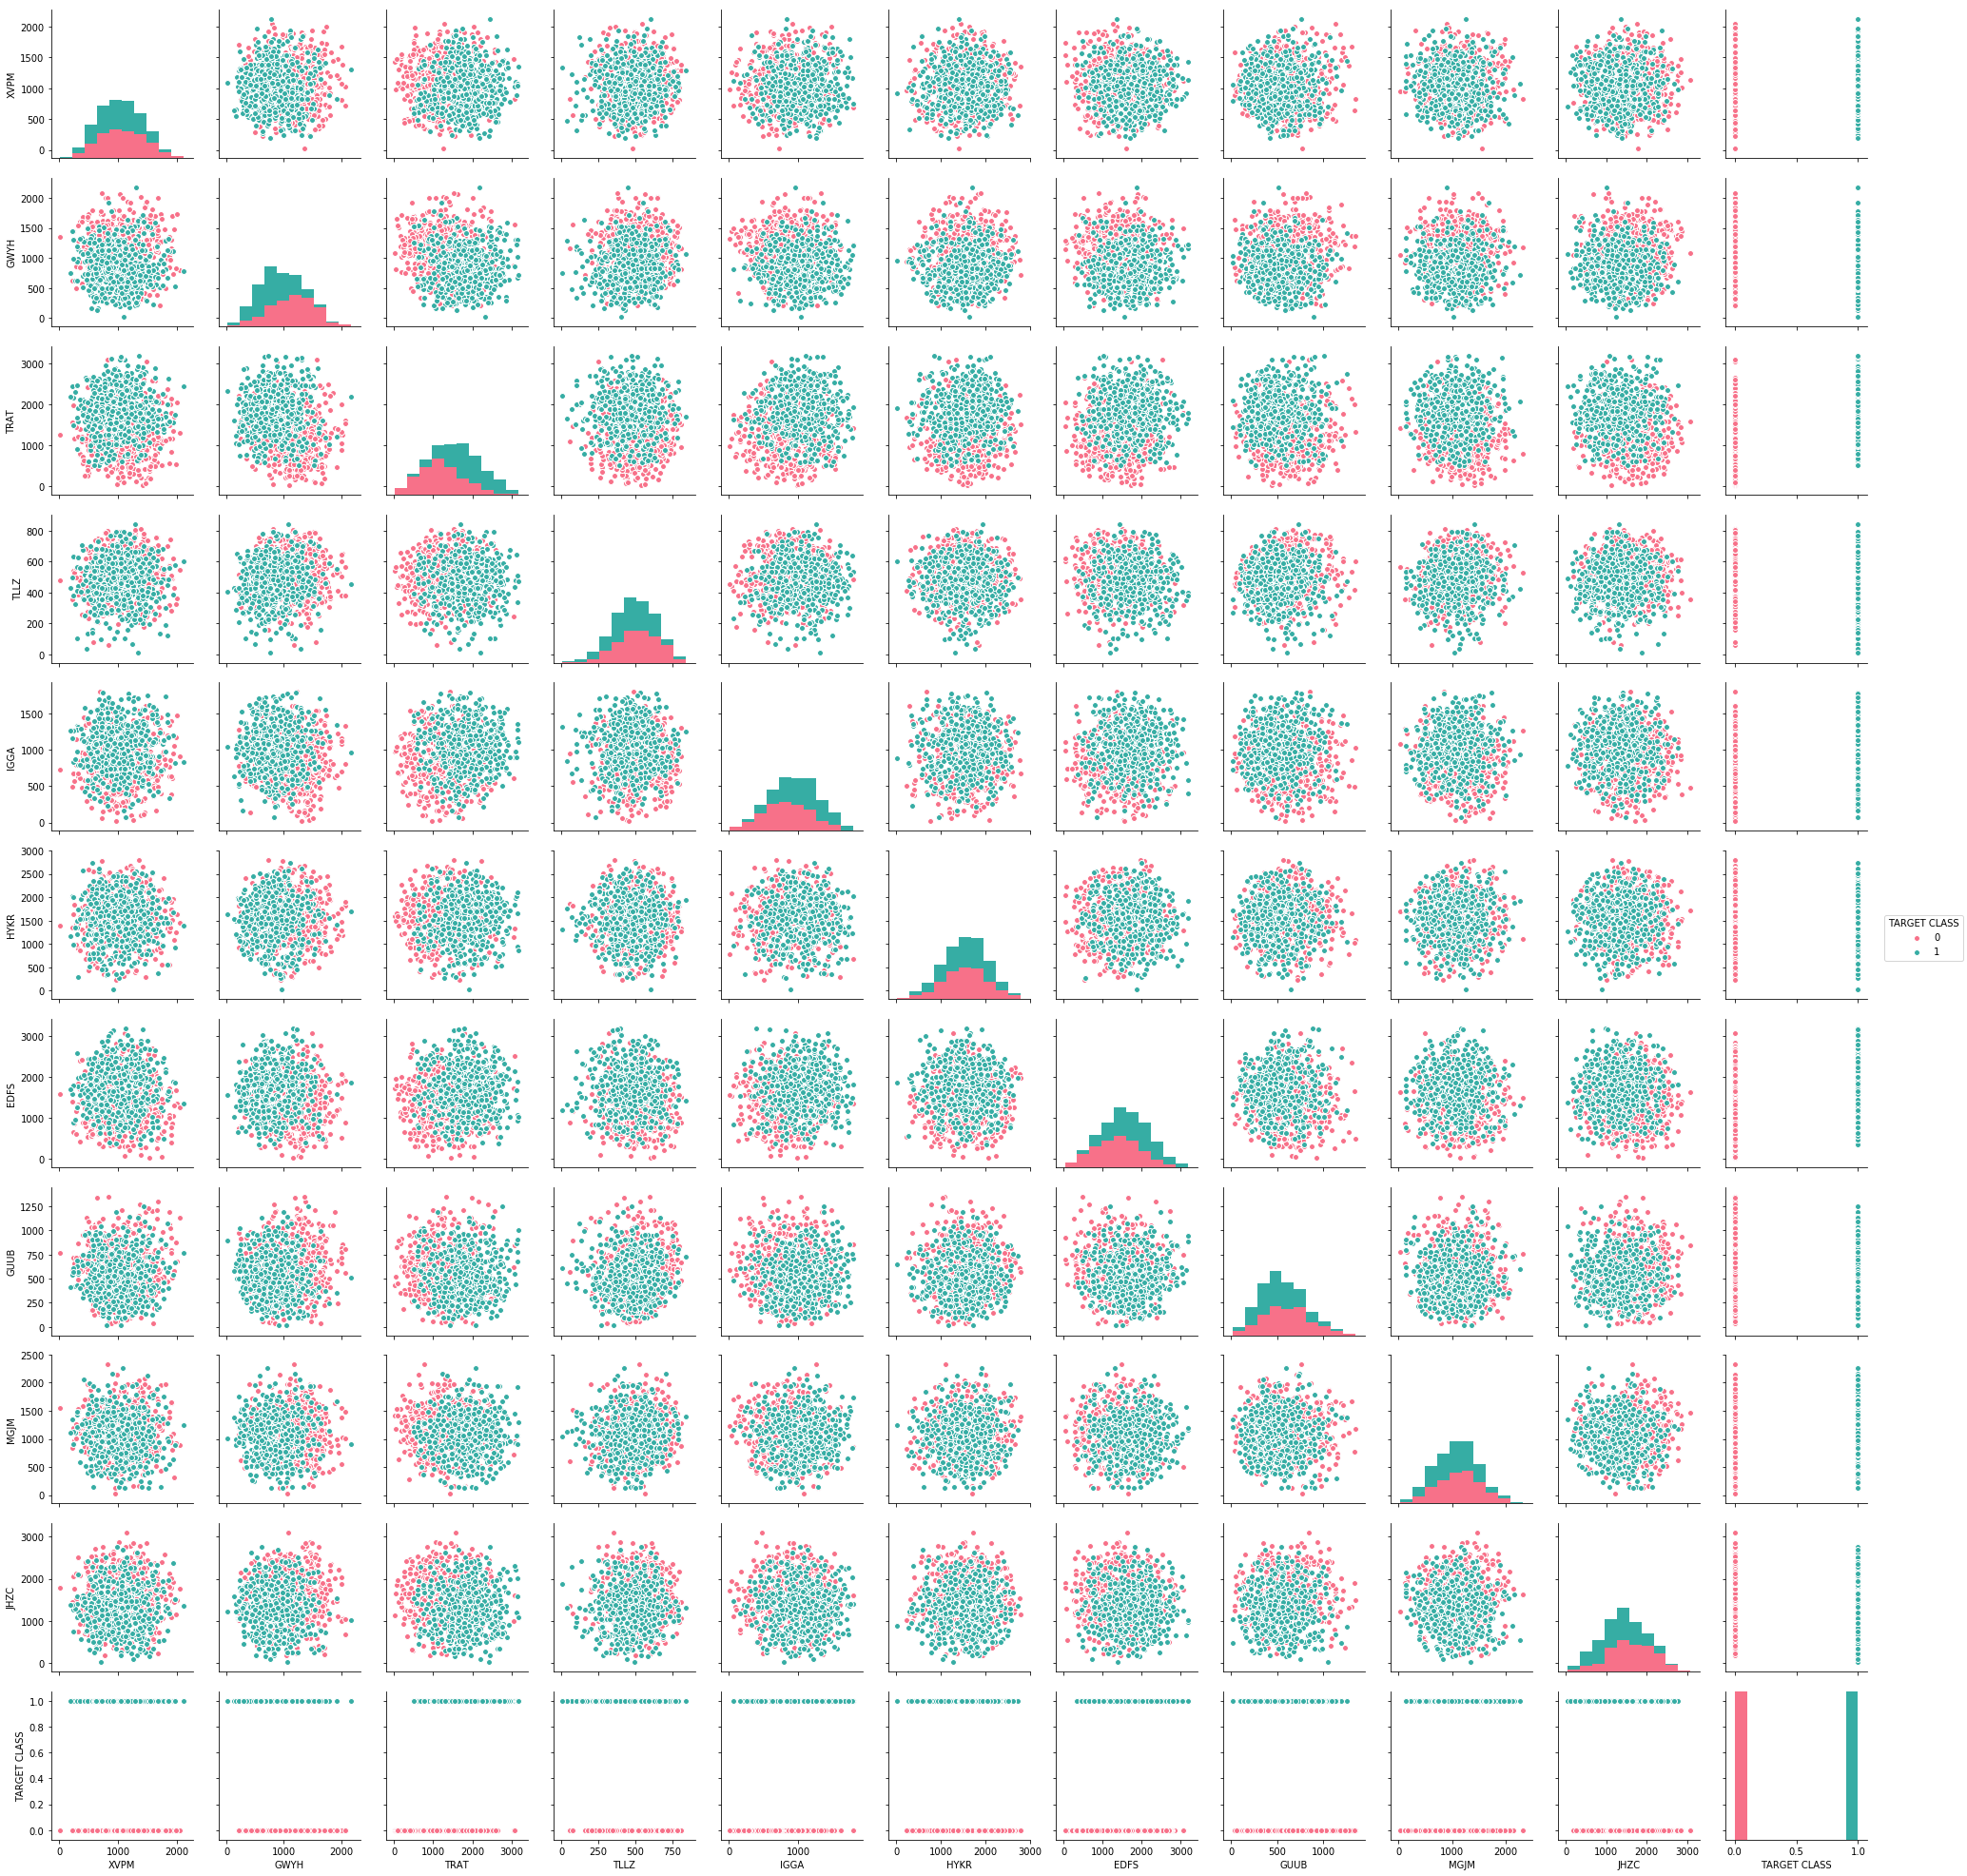

In [4]:
sns.pairplot(df,hue='TARGET CLASS',palette='husl')

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [7]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis = 1))
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

XVPM      GWYH      TRAT      TLLZ      IGGA      HYKR      EDFS  \
0  1.568522 -0.443435  1.619808 -0.958255 -1.128481  0.138336  0.980493   
1 -0.112376 -1.056574  1.741918 -1.504220  0.640009  1.081552 -1.182663   
2  0.660647 -0.436981  0.775793  0.213394 -0.053171  2.030872 -1.240707   
3  0.011533  0.191324 -1.433473 -0.100053 -1.507223 -1.753632 -1.183561   
4 -0.099059  0.820815 -0.904346  1.609015 -0.282065 -0.365099 -1.095644   

       GUUB      MGJM      JHZC  
0 -0.932794  1.008313 -1.069627  
1 -0.461864  0.258321 -1.041546  
2  1.149298  2.184784  0.342811  
3 -0.888557  0.162310 -0.002793  
4  0.391419 -1.365603  0.787762

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier(n_neighbors = 1)

In [12]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [24]:
predictions = knn.predict(X_test)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test,predictions))

[[109  43]
 [ 41 107]]


In [28]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.73      0.72      0.72       152
          1       0.71      0.72      0.72       148

avg / total       0.72      0.72      0.72       300



In [51]:
error_rate = []
for i in range(1,60):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

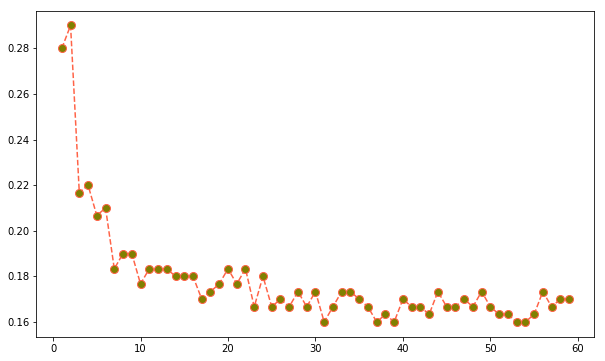

In [52]:
plt.figure(figsize=(10,6))
plt.plot(range(1,60),error_rate,color='tomato',linestyle='--',marker='o',markerfacecolor='olive',markersize=8)


In [53]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)
print('\n')
print(classification_report(y_test,pred))



             precision    recall  f1-score   support

          0       0.84      0.82      0.83       152
          1       0.82      0.84      0.83       148

avg / total       0.83      0.83      0.83       300

